In [51]:
import numpy as np
import pandas as pd
import os
import mysql.connector
from skimage import io
from sklearn.model_selection import train_test_split
from skimage.feature import hog, daisy
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
#print(os.listdir("./input"))

In [25]:
# MySQL info
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Luiz2001!',
    'database': 'campus_tour',
}

# Open connection to DB
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

(3264, 2448, 3)


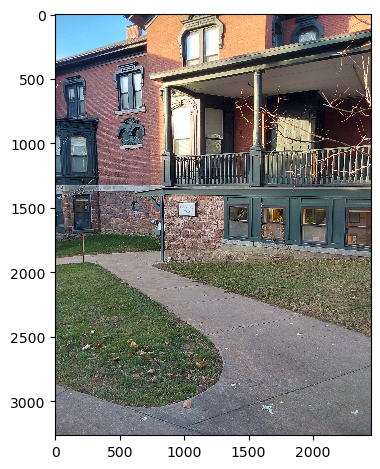

In [26]:
health = io.imread('C:/Users/luizc/Downloads/hc_6.jpg')
io.imshow(health)
print(health.shape)

image:  (2448, 3264, 3)


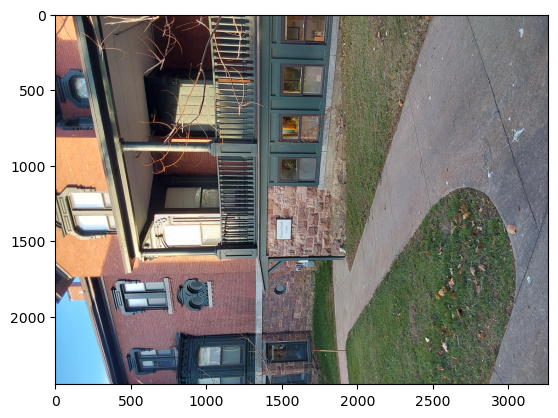

In [27]:
img = np.array(mpimg.imread('C:/Users/luizc/Downloads/hc_6.jpg'))
img.setflags(write = 1)
print('image: ', img.shape)
plt.imshow(img)
plt.show()

# pre-processing

image:  (128, 64, 3)


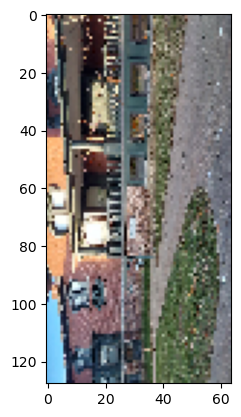

In [28]:
resized_img = cv2.resize(img, (64,128))
print('image: ', resized_img.shape)
plt.imshow(resized_img)
plt.show()

# feature extration

# Histogram of Oriented Gradients (HOG)

It analyzes the distribution of edge orientations within an object to describe its shape and appearance. The HOG method involves computing the gradient magnitude and orientation for each pixel in an image and then dividing the image into small cells.

(6804,)
[0.22470164 0.         0.0429899  ... 0.03672512 0.03302361 0.09536651]
(128, 64)


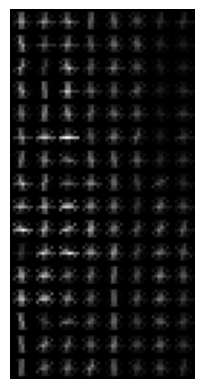

In [29]:
fd, hog_image = hog(resized_img, visualize=True, channel_axis =2)
print(fd.shape)
print(fd)
print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

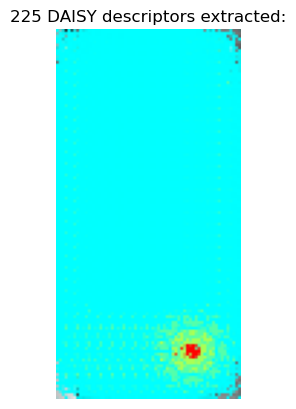

In [30]:
fd, daisy_image = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY), visualize=True)

fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(daisy_image)
daisy_num = fd.shape[0] * fd.shape[1]
ax.set_title(f"{daisy_num} DAISY descriptors extracted:")
plt.show()

In [31]:
hog_image

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 8.33353424, ..., 2.05258751, 0.        ,
        0.        ],
       [0.        , 8.98616672, 0.        , ..., 0.        , 1.57725602,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 3.80675375,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.6127342 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
data_aiken_hog = []
data_map_hog = []
data_ccm_hog = []
data_durick_hog = []
data_eats_hog = []
data_finney_hog = []
data_foster_hog = []
data_freeman_hog = []
data_garden_hog = []
data_hauke_hog = []
data_health_hog = []
data_idx_hog = []
data_joyce_hog = []
data_jbike_hog = []
data_metz_hog = []
data_miller_hog = []
data_perry_hog = []
data_rowell_annex_hog = []
data_sam_hog = []
data_ireland_hog = []
data_skiff_hog = []
data_west_hog = []
data_wick_hog = []

for entry in glob.glob(f'C:/Capstone/Campus Pictures/Aiken/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_aiken_hog.append(fd)

for entry in glob.glob(f'C:/Capstone/Campus Pictures/Campus Map/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_map_hog.append(fd)

for entry in glob.glob(f'C:/Capstone/Campus Pictures/CCM/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_ccm_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Durick Hall/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_durick_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/EATS/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_eats_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Finney Quad/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_finney_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Foster/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_foster_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Freeman Hall/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_freeman_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Garden House/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_garden_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Hauke Courtyard/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_hauke_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Health Center/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_health_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/IDX/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_idx_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Joyce Hall/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_joyce_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Juniper Bike/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_jbike_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Metz Studio Barn/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_metz_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Miller Center/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_miller_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Perry Hall/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_perry_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Rowell Annex/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_rowell_annex_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Samuel De Champlain/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_sam_hog.append(fd)

for entry in glob.glob(f'C:/Capstone/Campus Pictures/SD Ireland/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_ireland_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Skiff Hall/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_skiff_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/West Hall/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_west_hog.append(fd)
    
for entry in glob.glob(f'C:/Capstone/Campus Pictures/Wick Hall/*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_wick_hog.append(fd)
    
train_data_hog = (
    data_aiken_hog + data_map_hog + data_ccm_hog + data_durick_hog + data_eats_hog +
    data_finney_hog + data_foster_hog + data_freeman_hog + data_garden_hog + data_hauke_hog +
    data_health_hog + data_idx_hog + data_joyce_hog + data_jbike_hog + data_metz_hog +
    data_miller_hog + data_perry_hog + data_rowell_annex_hog + data_sam_hog + data_ireland_hog +
    data_skiff_hog + data_west_hog + data_wick_hog
)

print(len(train_data_hog))

218


In [33]:
'''data_dogs = []

for entry in glob.glob("./input/training_set/training_set/dogs/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_dogs.append(fd)
    
data_cats = []

for entry in glob.glob("./input/training_set/training_set/cats/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = hog(resized_img,channel_axis =2)
    data_cats.append(fd)
    
train_data = data_dogs+data_cats
print(len(train_data))'''

'data_dogs = []\n\nfor entry in glob.glob("./input/training_set/training_set/dogs/*.jpg"):\n    img = np.array(mpimg.imread(entry))\n    resized_img = cv2.resize(img, (64,32))\n    fd = hog(resized_img,channel_axis =2)\n    data_dogs.append(fd)\n    \ndata_cats = []\n\nfor entry in glob.glob("./input/training_set/training_set/cats/*.jpg"):\n    img = np.array(mpimg.imread(entry))\n    resized_img = cv2.resize(img, (64,32))\n    fd = hog(resized_img,channel_axis =2)\n    data_cats.append(fd)\n    \ntrain_data = data_dogs+data_cats\nprint(len(train_data))'

In [34]:
data_aiken_daisy = []
data_map_daisy = []
data_ccm_daisy = []
data_durick_daisy = []
data_eats_daisy = []
data_finney_daisy = []
data_foster_daisy = []
data_freeman_daisy = []
data_garden_daisy = []
data_hauke_daisy = []
data_health_daisy = []
data_idx_daisy = []
data_joyce_daisy = []
data_jbike_daisy = []
data_metz_daisy = []
data_miller_daisy = []
data_perry_daisy = []
data_rowell_annex_daisy = []
data_sam_daisy = []
data_ireland_daisy = []
data_skiff_daisy = []
data_west_daisy = []
data_wick_daisy = []

for entry in glob.glob("C:/Capstone/Campus Pictures/Aiken/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_aiken_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Campus Map/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_map_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/CCM/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_ccm_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Durick Hall/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_durick_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/EATS/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_eats_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Finney Quad/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_finney_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Foster/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_foster_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Freeman Hall/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_freeman_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Garden House/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_garden_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Hauke Courtyard/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_hauke_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Health Center/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_health_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/IDX/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_idx_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Joyce Hall/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_joyce_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Juniper Bike/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_jbike_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Metz Studio Barn/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_metz_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Miller Center/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_miller_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Perry Hall/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_perry_daisy.append(fd.flatten())
    
for entry in glob.glob("C:/Capstone/Campus Pictures/Rowell Annex/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_rowell_annex_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Samuel De Champlain/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_sam_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/SD Ireland/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_ireland_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Skiff Hall/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_skiff_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/West Hall/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_west_daisy.append(fd.flatten())

for entry in glob.glob("C:/Capstone/Campus Pictures/Wick Hall/*"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64,32))
    fd = daisy(cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY))
    data_wick_daisy.append(fd.flatten())

train_data_daisy = (
    data_aiken_daisy + data_map_daisy + data_ccm_daisy + data_durick_daisy + data_eats_daisy +
    data_finney_daisy + data_foster_daisy + data_freeman_daisy + data_garden_daisy + data_hauke_daisy +
    data_health_daisy + data_idx_daisy + data_joyce_daisy + data_jbike_daisy + data_metz_daisy +
    data_miller_daisy + data_perry_daisy + data_rowell_annex_daisy + data_sam_daisy + data_ireland_daisy +
    data_skiff_daisy + data_west_daisy + data_wick_daisy
)

print(len(train_data_daisy))

218


In [36]:
# Combine your HOG and Daisy features
X = np.concatenate((train_data_hog, train_data_daisy), axis=1)

# Labels for the data, assuming each category corresponds to a different area
y = np.array(['Aiken'] * len(data_aiken_hog) + ['Campus Map'] * len(data_map_hog) + ['CCM'] * len(data_ccm_hog) +
             ['Durick Hall'] * len(data_durick_hog) + ['EATS'] * len(data_eats_hog) + ['Finney Quad'] * len(data_finney_hog) +
             ['Foster'] * len(data_foster_hog) + ['Freeman Hall'] * len(data_freeman_hog) + ['Garden House'] * len(data_garden_hog) +
             ['Hauke Courtyard'] * len(data_hauke_hog) + ['Health Center'] * len(data_health_hog) + ['IDX'] * len(data_idx_hog) +
             ['Joyce Hall'] * len(data_joyce_hog) + ['Juniper Bike'] * len(data_jbike_hog) + ['Metz Studio Barn'] * len(data_metz_hog) +
             ['Miller Center'] * len(data_miller_hog) + ['Perry Hall'] * len(data_perry_hog) + ['Rowell Annex'] * len(data_rowell_annex_hog) +
             ['Samuel De Champlain'] * len(data_sam_hog) + ['SD Ireland'] * len(data_ireland_hog) + ['Skiff Hall'] * len(data_skiff_hog) +
             ['West Hall'] * len(data_west_hog) + ['Wick Hall'] * len(data_wick_hog))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Instantiate KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict labels for the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3409090909090909


In [52]:
# Calculate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
                     precision    recall  f1-score   support

              Aiken       0.00      0.00      0.00         0
                CCM       0.29      0.33      0.31         6
        Durick Hall       0.25      0.50      0.33         2
       Freeman Hall       0.00      0.00      0.00         0
       Garden House       0.25      0.33      0.29         3
    Hauke Courtyard       0.00      0.00      0.00         1
      Health Center       0.00      0.00      0.00         1
                IDX       0.00      0.00      0.00         2
         Joyce Hall       0.00      0.00      0.00         1
   Metz Studio Barn       0.25      0.33      0.29         3
      Miller Center       0.00      0.00      0.00         1
         Perry Hall       0.25      0.67      0.36         3
       Rowell Annex       0.00      0.00      0.00         2
         SD Ireland       0.50      0.25      0.33         4
Samuel De Champlain       1.00      1.00      1.00         1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla